<a href="https://colab.research.google.com/github/dr-mushtaq/Projects/blob/master/Tokenization_stemming_lemmatization_stopword_postagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**📚Introduction**</p>

Natural Language Processing (NLP) has become a cornerstone of modern data science, allowing computers to understand, interpret, and respond to human language in a valuable way. Among the fundamental techniques in NLP are tokenization, stemming, lemmatization, stop words removal, and part-of-speech (POS) tagging. This blog will explore these essential processes and how they contribute to effective text analysis.

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**📚Table of Content**</p>


*   Install requirements
*   Dataset
*   Lower Case
*   Removing digits
*   Removing punctuations
*   Removing trailing whitespaces
*   Tokenizing
*   Stemming
*   Lemmatization
*   POS Tagging


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Main Steps Involved in Data Preparation**</p>


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**1-Data Collection**</p>

### **📚Install requirements**

In [1]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy==1.19.5
!pip install nltk==3.2.5
!pip install spacy==2.2.4

# ===========================

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 21.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392143 sha256=dd00ca056d392c64c1e1ac745ac1f53eb977211a3bda0bb8b99b9a1e3c7b2ca2
  Stored in directory: /root/.cache/pip/wheels/50/d6/35/4a8a48ea9fe03abae30da7971b8ed2a350436bebc00541372b
Succ

### **📚Dataset**

In [ ]:
#This will be our corpus which we will work on
corpus_original = "Need to finalize the demo corpus which will be used for this notebook and it should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"
corpus = "Need to finalize the demo corpus which will be used for this notebook & should be done soon !!. It should be done by the ending of this month. But will it? This notebook has been run 4 times !!"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /NLP/Datasets/Emotion /text_emotion.csv')


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**2-📚Understanding What’s Inside Your Dataset**</p>

In [6]:
data.head()


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [10]:
# adding a column to represent the length of the tweet

data['len'] = data['content'].str.len()

In [11]:
data.head()

,tweet_id,sentiment,author,content,len
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86


In [12]:
data.groupby('sentiment').describe()

tweet_id                                                          \
              count          mean           std           min           25%   
sentiment                                                                     
anger         110.0  1.901446e+09  1.054069e+08  1.694054e+09  1.804612e+09   
boredom       179.0  1.912465e+09  9.565245e+07  1.694034e+09  1.957196e+09   
empty         827.0  1.858058e+09  1.193787e+08  1.693956e+09  1.751610e+09   
enthusiasm    759.0  1.808281e+09  1.142946e+08  1.693957e+09  1.695731e+09   
fun          1776.0  1.790245e+09  1.055019e+08  1.693957e+09  1.695758e+09   
happiness    5209.0  1.769092e+09  9.199737e+07  1.693956e+09  1.695341e+09   
hate         1323.0  1.915780e+09  9.406515e+07  1.693957e+09  1.957250e+09   
love         3842.0  1.780366e+09  9.581246e+07  1.693957e+09  1.695963e+09   
neutral      8638.0  1.827028e+09  1.190011e+08  1.693956e+09  1.696002e+09   
relief       1526.0  1.793640e+09  1.096695e+08  1.693958e+09  1.695442e+09   
sadness      5165.0  1.928605e+09  8.350930e+07  1.693975e+09  1.957549e+09   
surprise     2187.0  1.841813e+09  1.183997e+08  1.693956e+09  1.751395e+09   
worry        8459.0  1.899646e+09  1.053726e+08  1.693957e+09  1.753714e+09   

                                                         len             \
                     50%           75%           max   count       mean   
sentiment                                                                 
anger       1.961382e+09  1.963961e+09  1.966274e+09   110.0  77.672727   
boredom     1.961888e+09  1.963881e+09  1.966412e+09   179.0  74.184358   
empty       1.957507e+09  1.963576e+09  1.966428e+09   827.0  64.604595   
enthusiasm  1.753050e+09  1.960939e+09  1.966436e+09   759.0  74.794466   
fun         1.752646e+09  1.957247e+09  1.966409e+09  1776.0  81.302365   
happiness   1.752228e+09  1.753618e+09  1.966425e+09  5209.0  75.604147   
hate        1.961568e+09  1.964329e+09  1.966440e+09  1323.0  78.544974   
love        1.752647e+09  1.753758e+09  1.966435e+09  3842.0  74.497657   
neutral     1.753467e+09  1.962106e+09  1.966441e+09  8638.0  64.480088   
relief      1.752605e+09  1.957742e+09  1.966440e+09  1526.0  76.484928   
sadness     1.962137e+09  1.964396e+09  1.966440e+09  5165.0  74.991481   
surprise    1.753805e+09  1.962433e+09  1.966441e+09  2187.0  75.741198   
worry       1.961225e+09  1.963902e+09  1.966441e+09  8459.0  76.744296   

                                                       
                  std   min   25%   50%    75%    max  
sentiment                                              
anger       35.247255  10.0  47.0  77.0  103.0  145.0  
boredom     36.248589  12.0  42.5  68.0  104.0  150.0  
empty       36.395788   1.0  34.0  59.0   90.0  152.0  
enthusiasm  35.890701  10.0  43.5  70.0  103.0  147.0  
fun         34.785205   9.0  52.0  78.5  112.0  158.0  
happiness   35.612141   7.0  46.0  71.0  105.0  157.0  
hate        36.767167   7.0  47.0  78.0  109.0  152.0  
love        35.748509   9.0  45.0  70.0  103.0  158.0  
neutral     36.908814   1.0  34.0  56.0   92.0  157.0  
relief      35.985126   8.0  46.0  74.0  106.0  156.0  
sadness     36.257085   6.0  45.0  71.0  105.0  161.0  
surprise    36.317369   7.0  45.0  71.0  105.0  166.0  
worry       36.214656   7.0  47.0  73.0  107.0  167.0


##<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**3-📚Data visualization**</p>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment'>

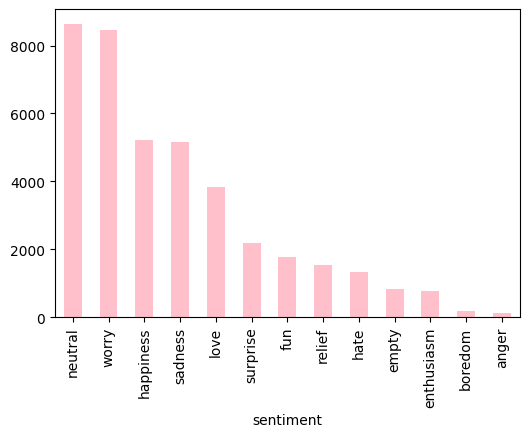

In [8]:
data['sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

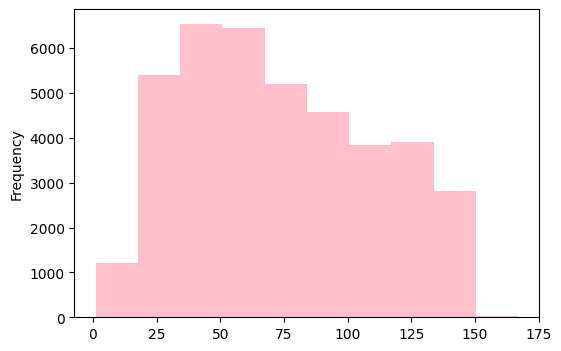

In [9]:
# checking the distribution of tweets in the data

length_train = data['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

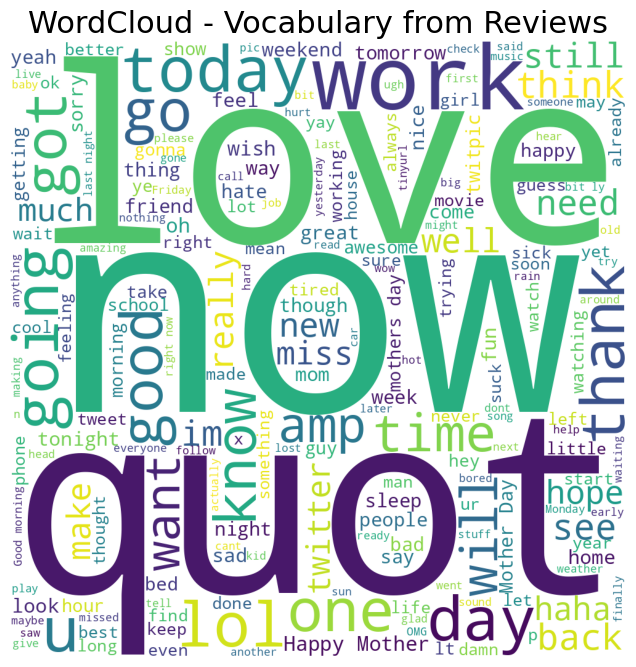

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming 'content' column contains the text data
text = ' '.join(data['content'].astype(str).tolist()) # Convert content to string

# Generate wordcloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
plt.axis("off") # Remove axis
plt.show()

## **2- Data Cleaning:**

### **📚Drow Colum and rows**

In [ ]:
data = data.drop('author', axis=1)


This one’s a simple dataset with just four columns, the tweet ID, emotion depicted by the tweet, the author, and the text content of the tweet. We do not necessarily need the author column. Hence we can drop it.

In [ ]:
data.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Dropping rows with other emotion labels



In [ ]:
 # Dropping rows with other emotion labels
data = data.drop(data[data.sentiment == 'anger'].index)
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'neutral'].index)
data = data.drop(data[data.sentiment == 'worry'].index)



In [ ]:
data.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


### **📚Lower Case**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

One of the simplest yet most important steps in text preprocessing is lowercasing. This step involves converting all the characters in the text to lowercase. Despite its simplicity, lowercasing plays a significant role in ensuring consistent and accurate text analysis

**Method 1**

In [ ]:
#lower case the corpus
#lower case the corpus
data['content'] = data['content'].str.lower() # Apply lower() to the 'sentiment' column
print(data)

         tweet_id  sentiment  \
1      1956967666    sadness   
2      1956967696    sadness   
6      1956968487    sadness   
8      1956969035    sadness   
9      1956969172    sadness   
...           ...        ...   
39986  1753905153  happiness   
39987  1753918809  happiness   
39988  1753918818  happiness   
39994  1753918900  happiness   
39998  1753919043  happiness   

                                                 content  
1      layin n bed with a headache  ughhhh...waitin o...  
2                    funeral ceremony...gloomy friday...  
6      i should be sleep, but im not! thinking about ...  
8                @charviray charlene my love. i miss you  
9             @kelcouch i'm sorry  at least it's friday?  
...                                                  ...  
39986  going to watch boy in the striped pj's hope i ...  
39987  gave the bikes a thorough wash, degrease it an...  
39988  had such and amazing time last night, mcfly we...  
39994                    

**Method 2**

In [ ]:
#Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed with a headache ughhhh...waitin on...
2,1956967696,sadness,funeral ceremony...gloomy friday...
6,1956968487,sadness,"i should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray charlene my love. i miss you
9,1956969172,sadness,@kelcouch i'm sorry at least it's friday?


### **📚Removing numbers**

Digits and numbers can add noise to the text data, especially when they are not relevant to the analysis. Removing them can help in focusing on the textual content that carries meaningful information

In [ ]:
#removing digits in the corpus
import re

# Apply the substitution to the 'content' column of the DataFrame
data['content'] = data['content'].str.replace(r'\d+', '', regex=True)
print(data)

         tweet_id  sentiment  \
1      1956967666    sadness   
2      1956967696    sadness   
6      1956968487    sadness   
8      1956969035    sadness   
9      1956969172    sadness   
...           ...        ...   
39986  1753905153  happiness   
39987  1753918809  happiness   
39988  1753918818  happiness   
39994  1753918900  happiness   
39998  1753919043  happiness   

                                                 content  
1      layin n bed with a headache  ughhhh...waitin o...  
2                    funeral ceremony...gloomy friday...  
6      i should be sleep, but im not! thinking about ...  
8                @charviray charlene my love. i miss you  
9             @kelcouch i'm sorry  at least it's friday?  
...                                                  ...  
39986  going to watch boy in the striped pj's hope i ...  
39987  gave the bikes a thorough wash, degrease it an...  
39988  had such and amazing time last night, mcfly we...  
39994                    

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,funeral ceremony...gloomy friday...
6,1956968487,sadness,"i should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray charlene my love. i miss you
9,1956969172,sadness,@kelcouch i'm sorry at least it's friday?


### **📚Removing punctuations**

Punctuation marks, while essential for human readability, often do not contribute to the meaning in the context of text analysis and can be considered noise in many NLP tasks. Removing punctuation is a common preprocessing step that helps in cleaning and standardizing the text data.

**Method 1**

In [ ]:
#removing punctuations
import string

# Apply translate to each element in the 'content' Series
data['content'] = data['content'].str.translate(str.maketrans('', '', string.punctuation))
print(data)

         tweet_id  sentiment  \
1      1956967666    sadness   
2      1956967696    sadness   
6      1956968487    sadness   
8      1956969035    sadness   
9      1956969172    sadness   
...           ...        ...   
39986  1753905153  happiness   
39987  1753918809  happiness   
39988  1753918818  happiness   
39994  1753918900  happiness   
39998  1753919043  happiness   

                                                 content  
1      layin n bed with a headache  ughhhhwaitin on y...  
2                          funeral ceremonygloomy friday  
6      i should be sleep but im not thinking about an...  
8                  charviray charlene my love i miss you  
9                 kelcouch im sorry  at least its friday  
...                                                  ...  
39986  going to watch boy in the striped pjs hope i d...  
39987  gave the bikes a thorough wash degrease it and...  
39988  had such and amazing time last night mcfly wer...  
39994                    

**Method 2**


In [ ]:
data['content'] = data['content'].str.replace('[^\w\s]',' ')

### **📚Removing trailing whitespaces**

Trailing whitespace can make the text data appear messy and unstructured. Removing it helps in creating a cleaner dataset, which is easier to process and analyze

In [ ]:
# Sample text with trailing whitespace
text = "This is an example sentence with trailing spaces.   "

In [ ]:
# Access the 'content' column and apply split to each element in the column
data['content'] = data['content'].apply(lambda x: ' '.join([token for token in str(x).split()]))
data

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on yo...
2,1956967696,sadness,funeral ceremonygloomy friday
6,1956968487,sadness,i should be sleep but im not thinking about an...
8,1956969035,sadness,charviray charlene my love i miss you
9,1956969172,sadness,kelcouch im sorry at least its friday
...,...,...,...
39986,1753905153,happiness,going to watch boy in the striped pjs hope i d...
39987,1753918809,happiness,gave the bikes a thorough wash degrease it and...
39988,1753918818,happiness,had such and amazing time last night mcfly wer...
39994,1753918900,happiness,succesfully following tayla


In [ ]:
!python -m spacy download en_core_web_sm

###📚 **Stopwords**

In [ ]:
#Removing Stop Words using NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **3-📚Tokenizing**

Tokenization is one of the most fundamental steps in Natural Language Processing (NLP). It involves breaking down a text into smaller units called tokens, which can be words, phrases, or even punctuation marks.

**Method 1**

In [ ]:
from pprint import pprint
##NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stop_words_nltk = set(stopwords.words('english'))

# Assuming 'content' is the column in your DataFrame containing the text you want to tokenize
tokenized_corpus_nltk = data['content'].apply(word_tokenize).tolist()
# Apply word_tokenize to the 'content' column of your DataFrame and convert the result to a list
# Now tokenized_corpus_nltk will contain a list of token lists, one for each document in your DataFrame

print("\nNLTK\nTokenized corpus:",tokenized_corpus_nltk)

# Flatten the list of token lists if you want a single list of all tokens
flat_tokenized_corpus_nltk = [item for sublist in tokenized_corpus_nltk for item in sublist]

tokenized_corpus_without_stopwords = [i for i in flat_tokenized_corpus_nltk if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



NLTK
Tokenized corpus: [['layin', 'n', 'bed', 'headache', 'ughhhhwaitin', 'call'], ['funeral', 'ceremonygloomy', 'friday'], ['sleep', 'im', 'thinking', 'old', 'friend', 'want', 'hes', 'married', 'damn', 'amp', 'wants', 'scandalous'], ['charviray', 'charlene', 'love', 'miss'], ['kelcouch', 'im', 'sorry', 'least', 'friday'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['brodyjenner', 'u', 'watch', 'hills', 'london', 'u', 'realise', 'tourture', 'weeks', 'weeks', 'late', 'watch', 'itonlinelol'], ['storm', 'electricity', 'gone'], ['sleepy', 'even', 'late', 'fail'], ['convinced', 'always', 'wanted', 'signals', 'give', 'offdamn', 'think', 'lost', 'another', 'friend'], ['tired', 'think', 'im', 'definitely', 'going', 'get', 'ear', 'infection', 'going', 'bed', 'quotearlyquot'], ['isaacmascote', 'im', 'sorry', 'people', 'rude', 'isaac', 'get', 'manners', 'know', 'better', 'lewd'], ['fudge', 'bsd', 'whole', 'paper', 'tired', 'ugh', 'hate', 'school', 'time', 'sleep'], ['etherradio', 

In [ ]:
data

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,funeral ceremonygloomy friday
6,1956968487,sadness,sleep im thinking old friend want hes married ...
8,1956969035,sadness,charviray charlene love miss
9,1956969172,sadness,kelcouch im sorry least friday
...,...,...,...
39986,1753905153,happiness,going watch boy striped pjs hope dont cry
39987,1753918809,happiness,gave bikes thorough wash degrease grease think...
39988,1753918818,happiness,amazing time last night mcfly incredible
39994,1753918900,happiness,succesfully following tayla


**Method 2**

In [ ]:
##SPACY
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
spacy_model = spacy.load('en_core_web_sm')

stopwords_spacy = spacy_model.Defaults.stop_words
print("\nSpacy:")
tokenized_corpus_spacy = word_tokenize(corpus)
print("Tokenized Corpus:",tokenized_corpus_spacy)
tokens_without_sw= [word for word in tokenized_corpus_spacy if not word in stopwords_spacy]

print("Tokenized corpus without stopwords",tokens_without_sw)


print("Difference between NLTK and spaCy output:\n",
      set(tokenized_corpus_without_stopwords)-set(tokens_without_sw))


Spacy:
Tokenized Corpus: ['need', 'to', 'finalize', 'the', 'demo', 'corpus', 'which', 'will', 'be', 'used', 'for', 'this', 'notebook', 'should', 'be', 'done', 'soon', 'it', 'should', 'be', 'done', 'by', 'the', 'ending', 'of', 'this', 'month', 'but', 'will', 'it', 'this', 'notebook', 'has', 'been', 'run', 'times']
Tokenized corpus without stopwords ['need', 'finalize', 'demo', 'corpus', 'notebook', 'soon', 'ending', 'month', 'notebook', 'run', 'times']
Difference between NLTK and spaCy output:
 {'used', 'done'}


## **4-📚Stemming**

Stemming helps in reducing different forms of a word to a common base form. For example, "running," "runs," and "ran" can all be reduced to "run." This normalization helps in treating related words as a single token

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

print("Before Stemming:")
print(data)

print("After Stemming:")
# Iterate through each word in the tokenized list
for word_list in tokenized_corpus_nltk:
    # Check if the element is a list
    if isinstance(word_list, list):
        # If it is a list, iterate through the words in the list
        for word in word_list:
            print(stemmer.stem(word), end=" ")
    else:
        # If it is not a list, directly stem the word
        print(stemmer.stem(word_list), end=" ")

Before Stemming:
         tweet_id  sentiment  \
1      1956967666    sadness   
2      1956967696    sadness   
6      1956968487    sadness   
8      1956969035    sadness   
9      1956969172    sadness   
...           ...        ...   
39986  1753905153  happiness   
39987  1753918809  happiness   
39988  1753918818  happiness   
39994  1753918900  happiness   
39998  1753919043  happiness   

                                                 content  
1                 layin n bed headache ughhhhwaitin call  
2                          funeral ceremonygloomy friday  
6      sleep im thinking old friend want hes married ...  
8                           charviray charlene love miss  
9                         kelcouch im sorry least friday  
...                                                  ...  
39986          going watch boy striped pjs hope dont cry  
39987  gave bikes thorough wash degrease grease think...  
39988           amazing time last night mcfly incredible  
39994   

In [ ]:
data.head()

,tweet_id,sentiment,content
1,1956967666,sadness,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,funeral ceremonygloomy friday
6,1956968487,sadness,sleep im thinking old friend want hes married ...
8,1956969035,sadness,charviray charlene love miss
9,1956969172,sadness,kelcouch im sorry least friday


## **5-📚Lemmatization**

Lemmatization is a critical text preprocessing step in Natural Language Processing (NLP) that reduces words to their base or dictionary form, known as the lemma

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!python3 -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

for word in tokenized_corpus_nltk:
    print(lemmatizer.lemmatize(word),end=" ")

NameError: name 'nltk' is not defined

# **📚POS Tagging**

Part-of-Speech (POS) tagging is a crucial step in Natural Language Processing (NLP) that involves labeling words in a text with their respective parts of speech, such as nouns, verbs, adjectives, adverbs, etc.

In [ ]:
#POS tagging using spacy
print("POS Tagging using spacy:")
doc = spacy_model(corpus_original)
# Token and Tag
for token in doc:
    print(token,":", token.pos_)

#pos tagging using nltk
nltk.download('averaged_perceptron_tagger')
print("POS Tagging using NLTK:")
pprint(nltk.pos_tag(word_tokenize(corpus_original)))

POS Tagging using spacy:
Need : VERB
to : PART
finalize : VERB
the : DET
demo : NOUN
corpus : NOUN
which : PRON
will : AUX
be : AUX
used : VERB
for : ADP
this : DET
notebook : NOUN
and : CCONJ
it : PRON
should : AUX
be : AUX
done : VERB
soon : ADV
! : PUNCT
! : PUNCT
. : PUNCT
It : PRON
should : AUX
be : AUX
done : VERB
by : ADP
the : DET
ending : NOUN
of : ADP
this : DET
month : NOUN
. : PUNCT
But : CCONJ
will : AUX
it : PRON
? : PUNCT
This : DET
notebook : NOUN
has : AUX
been : AUX
run : VERB
4 : NUM
times : NOUN
! : PUNCT
! : PUNCT


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


POS Tagging using NLTK:
[('Need', 'NN'),
 ('to', 'TO'),
 ('finalize', 'VB'),
 ('the', 'DT'),
 ('demo', 'NN'),
 ('corpus', 'NN'),
 ('which', 'WDT'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('used', 'VBN'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('notebook', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('soon', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('.', '.'),
 ('It', 'PRP'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('ending', 'VBG'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('month', 'NN'),
 ('.', '.'),
 ('But', 'CC'),
 ('will', 'MD'),
 ('it', 'PRP'),
 ('?', '.'),
 ('This', 'DT'),
 ('notebook', 'NN'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('run', 'VBN'),
 ('4', 'CD'),
 ('times', 'NNS'),
 ('!', '.'),
 ('!', '.')]


# **📚References**

[1-Text pre](https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch2/04_Tokenization_Stemming_lemmatization_stopword_postagging.ipynb?authuser=1#scrollTo=gPjHzKkCTJqm)

[2-Text_Classification-need to read](https://github.com/kk7nc/Text_Classification?tab=readme-ov-file#id66)